# Ada Boost Regressor Project 3.0

In [1]:
#Import Necessary Libraries
import numpy as np
import pandas as pd

#For DataVisualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:
#Lets import Datset
data=pd.read_csv('https://raw.githubusercontent.com/araj2/customer-database/master/Ecommerce%20Customers.csv')
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


# Get The Data


We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:



Avg. Session Length: Average session of in-store style advice sessions.

    
    
    
Time on App: Average time spent on App in minutes

    
    
Time on Website: Average time spent on Website in minutes

    
    
    
Length of Membership: How many years the customer has been a member.

    
    
    
Read in the Ecommerce Customers csv file as a DataFrame called customers.

In [3]:
#lets Check Data Summary.

In [5]:
data.shape

(500, 8)

In [6]:
data.isna().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [7]:
#There is no null values we are good to go .

In [8]:
#lets check stats

In [9]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [10]:
#In my view there is no outliers lets delete unnecessary libraries

In [11]:
data.drop(columns=['Email','Address','Avatar'],inplace=True)

In [12]:
data.shape

(500, 5)

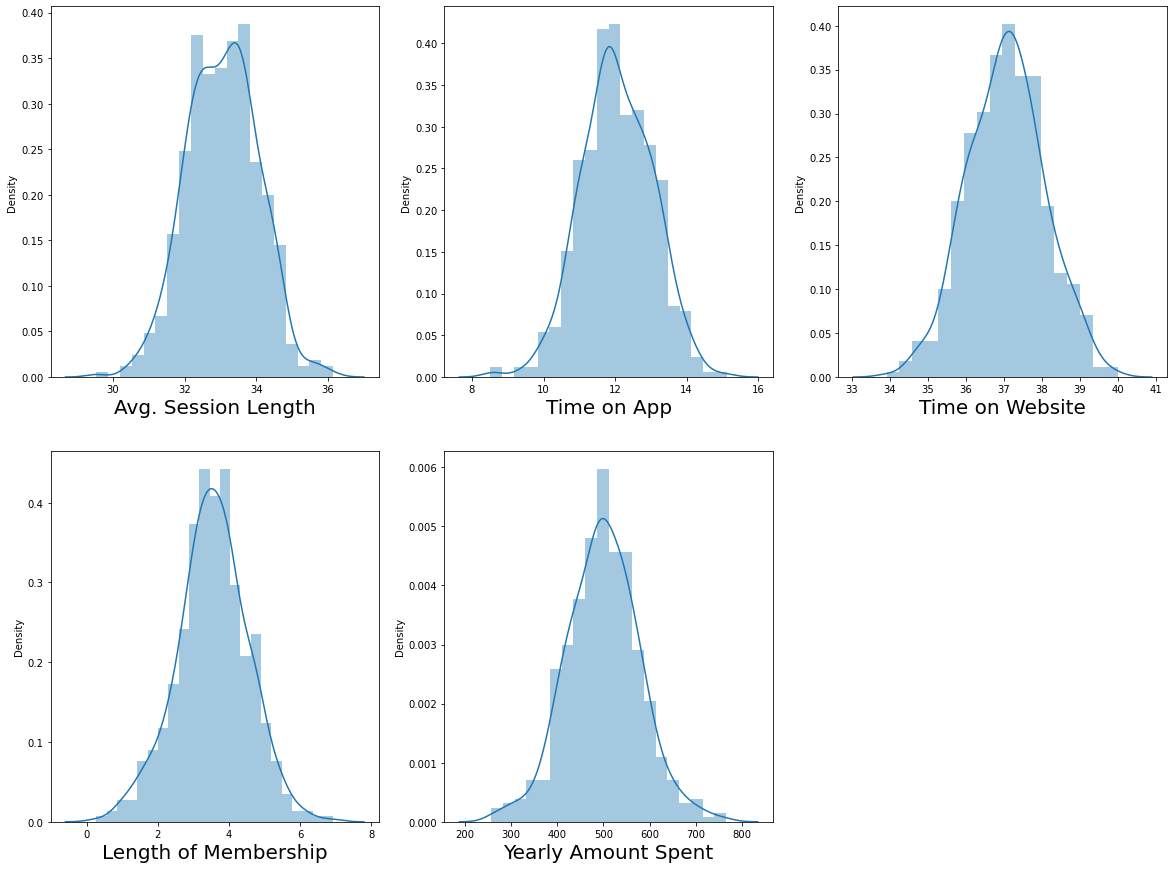

In [15]:
#Lets check how data is distributed
plt.figure(figsize=(20,15))
plotnumber =1
for column in data:
    if plotnumber <=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.show()

In [16]:
#Now i am confirmed my data is not overfitter and its normally distributed.
#Lets check multicollinearity problem.

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

In [20]:
x=data.drop(columns=['Yearly Amount Spent'])
y=data['Yearly Amount Spent']

In [22]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[ 1.45635117,  0.60728003,  2.49358859,  0.55010651],
       [-1.13650215, -0.94946372,  0.20655573, -0.87092735],
       [-0.05272322, -0.72713923,  0.04968115,  0.5720669 ],
       ...,
       [-0.40987204, -0.55685385,  1.26018697,  1.42726105],
       [ 0.27159708,  0.34124841, -0.21829075, -1.19904197],
       [ 0.66842216,  0.36882066, -1.27732288, -0.79967926]])

In [24]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]
vif['features']=x.columns
vif

,vif,features
0,1.005422,Avg. Session Length
1,1.008684,Time on App
2,1.010275,Time on Website
3,1.006949,Length of Membership


In [25]:
#I dont have any multicollinearity problem .
#So lets go for train_test_split

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=9425)

In [29]:
#Lets create one fucntion for checking again and again the score .

In [30]:
def metrics_score(cnn,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=cnn.predict(x_train)
        print("=================Training Score=============")
        print("Accuracy Score==> ",r2_score(y_train,y_pred)*100)
    elif train== False:
        pred=cnn.predict(x_test)
        print("==================Testing Score=============")
        print("Accuracy Score==> ",r2_score(y_test,pred)*100)
       
        

In [32]:
#Lets build a MOdel
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score

In [33]:
cnn=AdaBoostRegressor()

In [34]:
cnn.fit(x_train,y_train)

AdaBoostRegressor()

In [36]:
metrics_score(cnn,x_train,x_test,y_train,y_test,train=True)
metrics_score(cnn,x_train,x_test,y_train,y_test,train=False)

=================Training Score=============
Accuracy Score==>  91.84948775479482
==================Testing Score=============
Accuracy Score==>  87.42829537774453


In [37]:
#Our model is predicting good but we have to hyperparameter tuning

In [38]:
from sklearn.model_selection import RandomizedSearchCV

In [40]:
param={'learning_rate':[0.2,0.4,0.6,0.4],
      'n_estimators':[48,49,51,60,61,62]}

In [42]:
grd=RandomizedSearchCV(cnn,cv=5,param_distributions=param)

In [45]:
grd.fit(x_train,y_train)
cnn=grd.best_estimator_

In [46]:
cnn.fit(x_train,y_train)

AdaBoostRegressor(learning_rate=0.6, n_estimators=60)

In [47]:
metrics_score(cnn,x_train,x_test,y_train,y_test,train=True)
metrics_score(cnn,x_train,x_test,y_train,y_test,train=False)

=================Training Score=============
Accuracy Score==>  91.83626979524566
==================Testing Score=============
Accuracy Score==>  87.49795092537089


In [48]:
#Lets model is created 

In [49]:
#Student of DataScience
#Student of DataTrained - Saurav
#DATE- 23-09-2022
#Time - 16:23